:Step 1: Load the Dataset

In [2]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Step 2: Find Feature Names with Null Values


In [3]:
# Check for null values in each column
null_columns = df.columns[df.isnull().any()]
print("Columns with null values:", null_columns.tolist())

Columns with null values: ['Age', 'Cabin', 'Embarked']


Step 3: Handle Missing Data


In [4]:
# Fill null values in 'Age' with the mean of the column
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill null values in 'Cabin' with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

# Verify no null values remain
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64


<ipython-input-4-a0d1878a9212>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-4-a0d1878a9212>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Step 4: Plot Survived vs Dead (with Gender Breakdown)


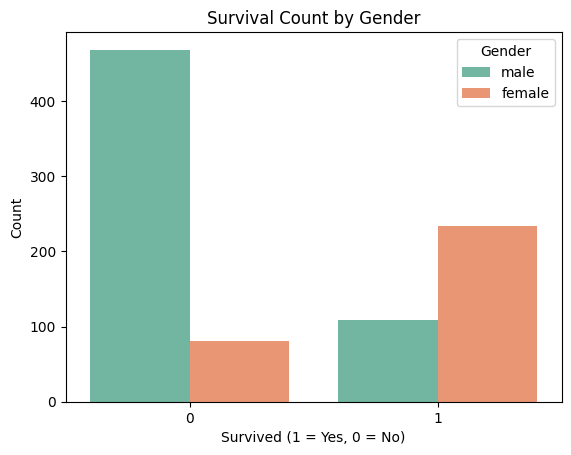

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot for Survived vs Dead, with gender breakdown
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set2')
plt.title('Survival Count by Gender')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

Step 5: Include 'Pclass' in the Survival Plot


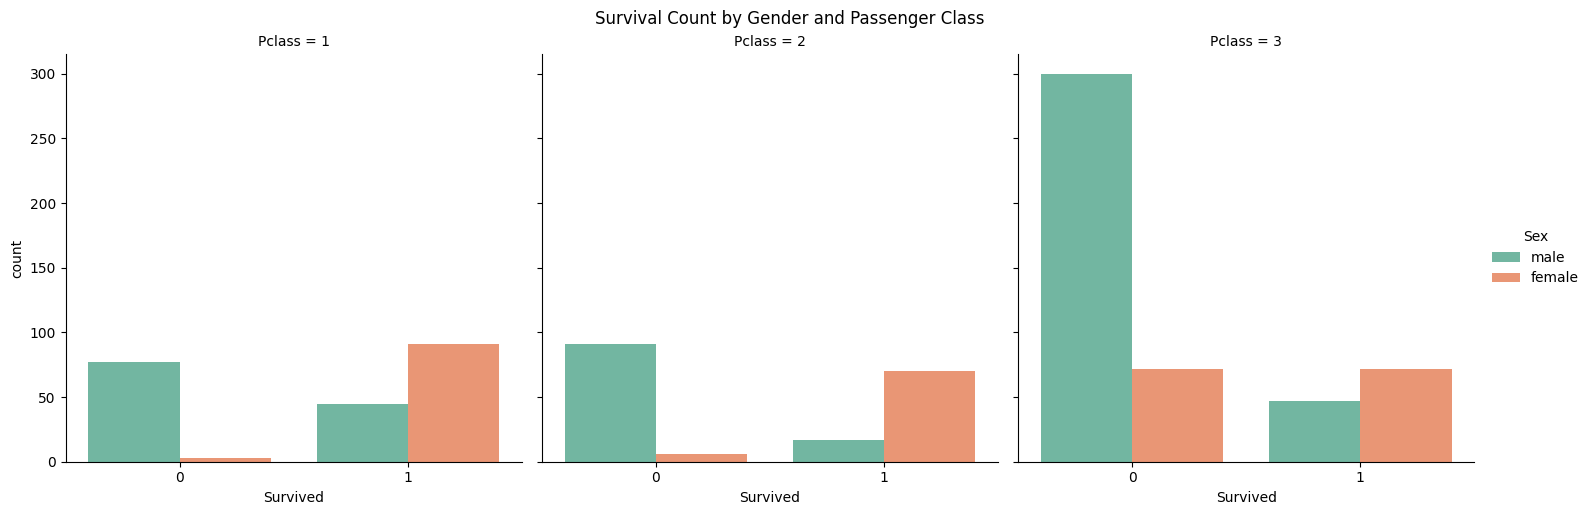

In [6]:
# Create a count plot for Survived vs Dead, with gender and Pclass breakdown
sns.catplot(x='Survived', hue='Sex', col='Pclass', data=df, kind='count', palette='Set2')
plt.suptitle('Survival Count by Gender and Passenger Class', y=1.02)
plt.show()

Step 6: Create 'AgeClass' Column


In [7]:
# Define a function to categorize age
def age_class(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

# Apply the function to create the 'AgeClass' column
df['AgeClass'] = df['Age'].apply(age_class)

# Display the first few rows to verify
print(df[['Age', 'AgeClass']].head())

    Age  AgeClass
0  22.0         1
1  38.0         3
2  26.0         1
3  35.0         2
4  35.0         2


Step 7: Drop the 'Age' Column


In [8]:
# Drop the 'Age' column
df.drop('Age', axis=1, inplace=True)

# Verify the column is dropped
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeClass'],
      dtype='object')


Step 8: Plot Survived vs Dead by 'AgeClass'


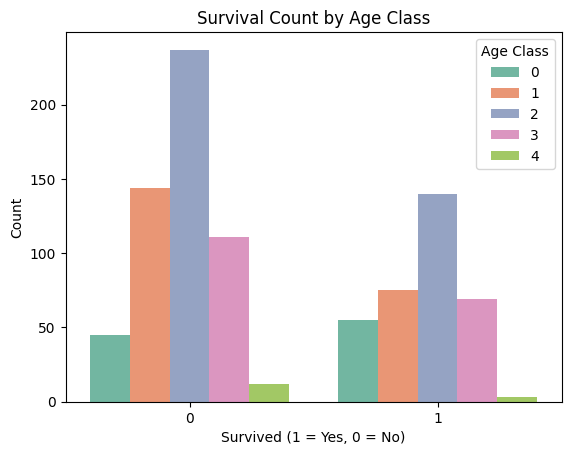

In [10]:
# Create a count plot for Survived vs Dead, with AgeClass breakdown
sns.countplot(x='Survived', hue='AgeClass', data=df, palette='Set2')
plt.title('Survival Count by Age Class')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Age Class')
plt.show()